In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
file_path = "C:/Users/Sara Bharat Mali/OneDrive/Desktop/codeclause/flight_data.csv"

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully:")
    print(df.head())  
except FileNotFoundError:
    print(f"The file {file_path} does not exist.")
except pd.errors.EmptyDataError:
    print(f"The file {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error occurred while parsing {file_path}. Ensure it is a valid CSV file.")
except Exception as e:
    print(f"An error occurred: {e}")


Data loaded successfully:
   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1    517.00             515       2.00    830.00   
1  2013      1    1    533.00             529       4.00    850.00   
2  2013      1    1    542.00             540       2.00    923.00   
3  2013      1    1    544.00             545      -1.00   1004.00   
4  2013      1    1    554.00             600      -6.00    812.00   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819      11.00      UA    1545  N14228    EWR  IAH    227.00   
1             830      20.00      UA    1714  N24211    LGA  IAH    227.00   
2             850      33.00      AA    1141  N619AA    JFK  MIA    160.00   
3            1022     -18.00      B6     725  N804JB    JFK  BQN    183.00   
4             837     -25.00      DL     461  N668DN    LGA  ATL    116.00   

   distance  hour  minute      time_hour  
0      1400     5      15  1/1/2013 5:00 

In [3]:
df.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,30-09-2013 08:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [5]:
df_summary = df.describe()
df_summary

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.00,336776.00,336776.00,328521.00,336776.00,328521.00,328063.00,336776.00,327346.00,336776.00,327346.00,336776.00,336776.00,336776.00
mean,2013.00,6.55,15.71,1349.11,1344.25,12.64,1502.05,1536.38,6.90,1971.92,150.69,1039.91,13.18,26.23
std,0.00,3.41,8.77,488.28,467.34,40.21,533.26,497.46,44.63,1632.47,93.69,733.23,4.66,19.30
min,2013.00,1.00,1.00,1.00,106.00,-43.00,1.00,1.00,-86.00,1.00,20.00,17.00,1.00,0.00
25%,2013.00,4.00,8.00,907.00,906.00,-5.00,1104.00,1124.00,-17.00,553.00,82.00,502.00,9.00,8.00
50%,2013.00,7.00,16.00,1401.00,1359.00,-2.00,1535.00,1556.00,-5.00,1496.00,129.00,872.00,13.00,29.00
75%,2013.00,10.00,23.00,1744.00,1729.00,11.00,1940.00,1945.00,14.00,3465.00,192.00,1389.00,17.00,44.00
max,2013.00,12.00,31.00,2400.00,2359.00,1301.00,2400.00,2359.00,1272.00,8500.00,695.00,4983.00,23.00,59.00


In [6]:
rows,cols = df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  336776
Number of columns:  19


In [7]:
flt_data_copy= df.dropna()
flt_data_copy.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00


In [8]:
carrier_count = df['carrier'].value_counts()
carrier_count

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: count, dtype: int64

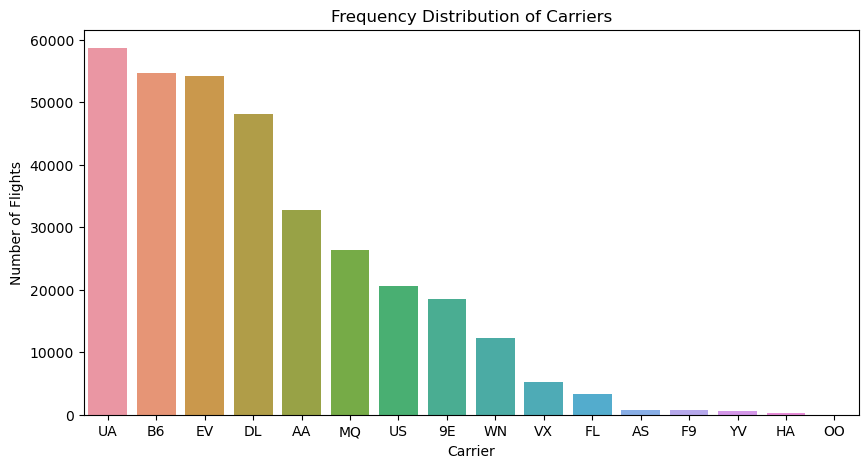

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='carrier', order=df['carrier'].value_counts().index, data=df)
plt.title('Frequency Distribution of Carriers')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.show()


In [10]:
allflight_NYC=flt_data_copy['dest'].unique()    
allflightcount_NYC=len(allflight_NYC)    
print("The total number of destination flight from NYC is"+ "::" ,allflightcount_NYC)
print('\n')

flt_data_copy['origin'].value_counts()

The total number of destination flight from NYC is:: 104




origin
EWR    117127
JFK    109079
LGA    101140
Name: count, dtype: int64

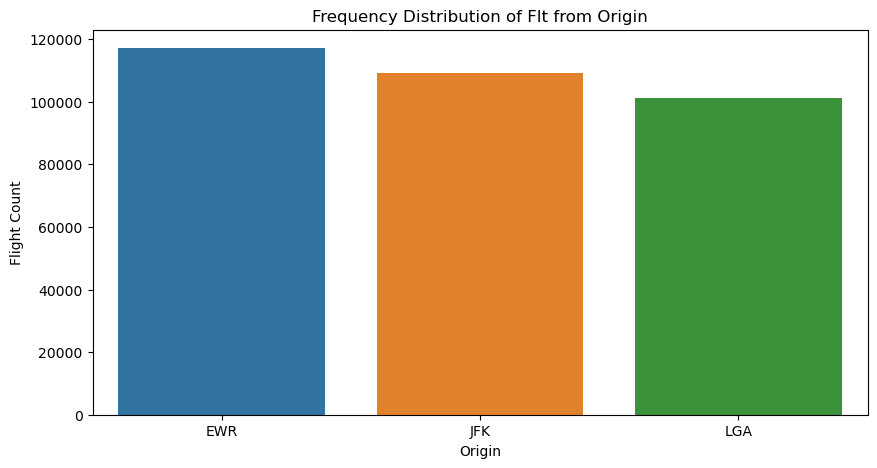

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='origin', order=flt_data_copy['origin'].value_counts().index, data=flt_data_copy)
plt.title('Frequency Distribution of Flt from Origin')
plt.xlabel('Origin')
plt.ylabel('Flight Count')
plt.show()


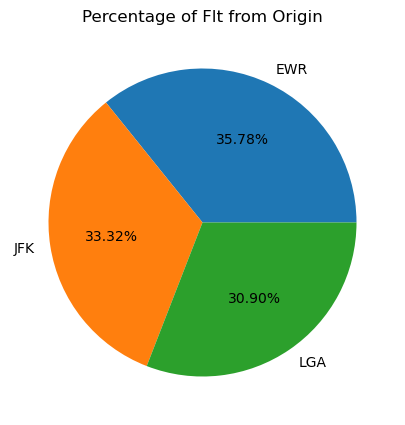

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
flt_data_copy['origin'].value_counts().plot.pie(autopct='%1.2f%%', shadow=False)                                                  
plt.title('Percentage of Flt from Origin')
plt.ylabel('')
plt.show()


In [13]:
Destination= df['dest'].value_counts().sort_values(ascending=False).head(15)
Destination

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
DTW     9384
DFW     8738
RDU     8163
TPA     7466
DEN     7266
Name: count, dtype: int64

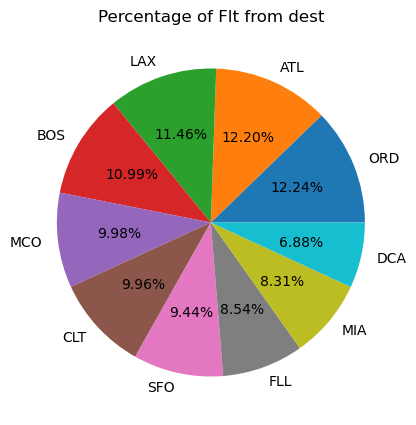

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
df['dest'].value_counts().head(10).sort_values(ascending=False).plot.pie(autopct='%1.2f%%', shadow=False)
plt.title('Percentage of Flt from dest')
plt.ylabel('')
plt.show()


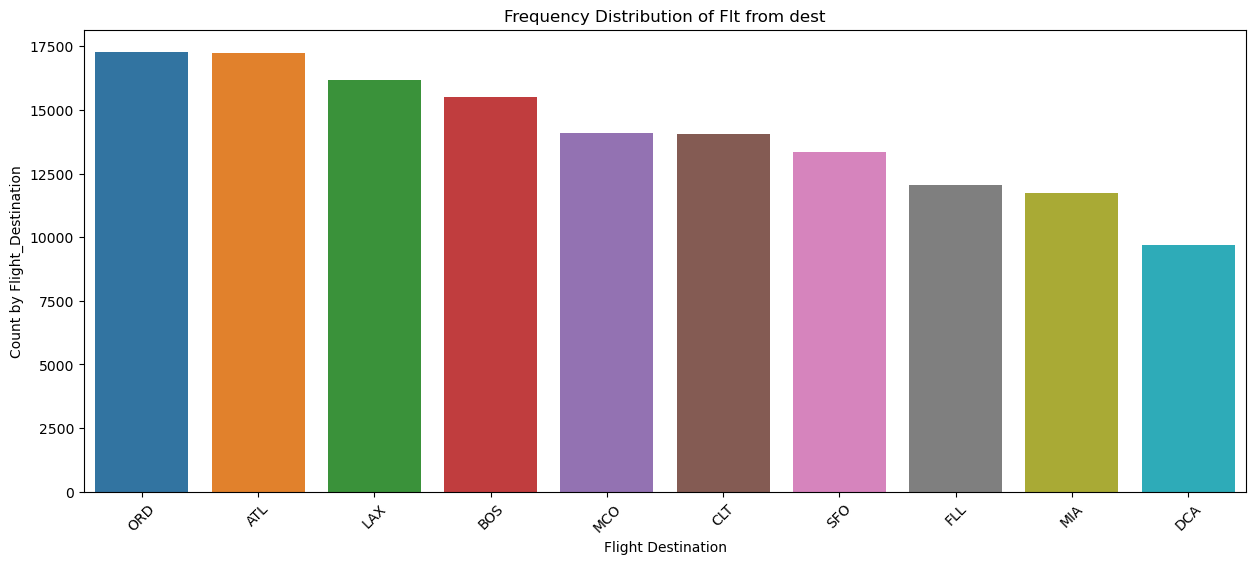

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(x='dest', order=df['dest'].sort_values(ascending=False).value_counts().head(10).index, data=df)
plt.title('Frequency Distribution of Flt from dest')
plt.xlabel('Flight Destination')
plt.ylabel('Count by Flight_Destination')
plt.xticks(rotation=45)
plt.show()


The top_10 destination flight from NYC are


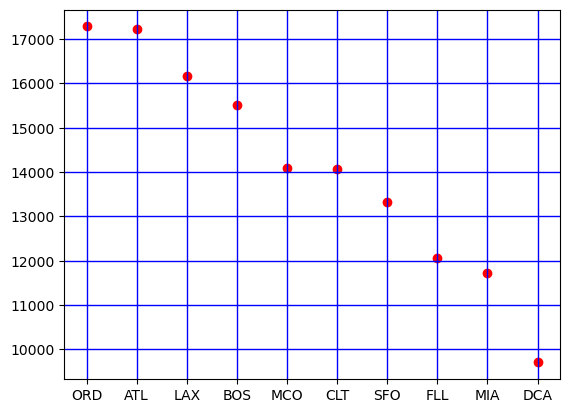

,dest,month
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
23,CLT,14064
90,SFO,13331
35,FLL,12055
58,MIA,11728
28,DCA,9705


In [16]:
dest_count=df.groupby(['dest'],as_index=False).agg({'month':'count'})
max_dest_count=dest_count.sort_values(['month'], ascending=False)
print("The top_10 destination flight from NYC are")
top_dest_flight = max_dest_count.head(10)
plt.scatter(top_dest_flight.dest,top_dest_flight.month, color='red')
plt.legend
plt.grid(True, color='blue', linewidth=1)
plt.show()
top_dest_flight

In [17]:
dest_flight = df.groupby('origin')['dest'].value_counts()

dest_flight.head(25)

origin  dest
EWR     ORD     6100
        BOS     5327
        SFO     5127
        CLT     5026
        ATL     5022
        MCO     4941
        LAX     4912
        IAH     3973
        FLL     3793
        DTW     3178
        DFW     3148
        DEN     2859
        PHX     2723
        CVG     2673
        MIA     2633
        STL     2516
        MSP     2377
        PBI     2351
        BNA     2336
        TPA     2334
        MDW     2043
        LAS     2010
        SEA     1831
        CLE     1754
        DCA     1719
Name: count, dtype: int64

In [18]:
print(flt_data_copy.columns)


Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')


In [19]:
Monthly_Avg_Delay = flt_data_copy.groupby(['carrier', 'month'], as_index=True).agg({'dep_delay': 'mean'})
Monthly_Avg_Delay.head(10)


dep_delay
carrier month           
9E      1          16.58
        2          16.39
        3          13.28
        4          13.45
        5          22.64
        6          28.31
        7          30.44
        8          17.11
        9           7.60
        10          9.33

c:\Users\Sara Bharat Mali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


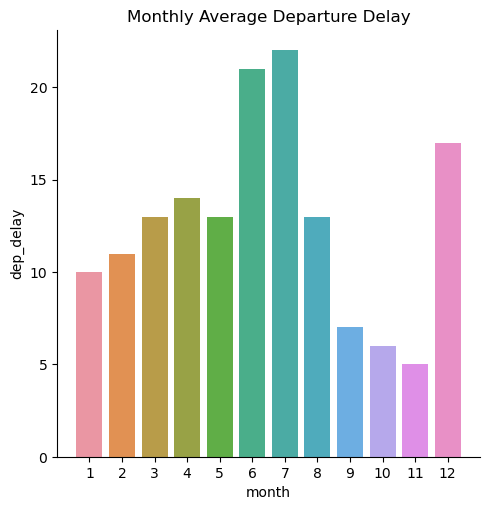

In [20]:
monthly_delay = df.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
monthly_delay['dep_delay']=np.round(monthly_delay['dep_delay'],0)
sns.catplot(x='month', y='dep_delay',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay") 
plt.plot()
plt.show()

In [21]:
flt_data_copy.groupby('carrier').agg(np.size)                 
top_delay = flt_data_copy.groupby('carrier').agg({'arr_delay' :[np.size,np.mean]})
                                                
                                                                
top_delay.sort_values([('arr_delay', 'mean')], ascending=False).head(15)

arr_delay      
             size  mean
carrier                
F9            681 21.92
FL           3175 20.12
EV          51108 15.80
YV            544 15.56
OO             29 11.93
MQ          25037 10.77
WN          12044  9.65
B6          54049  9.46
9E          17294  7.38
UA          57782  3.56
US          19831  2.13
VX           5116  1.76
DL          47658  1.64
AA          31947  0.36
HA            342 -6.92

In [22]:

flt_data_copy.groupby('dest').agg(np.size)              
airport_delay = flt_data_copy.groupby('dest').agg({'arr_delay' :[np.size,np.mean]})
airport_delay.sort_values([('arr_delay','mean')], ascending=False).head(10)

arr_delay      
          size  mean
dest                
CAE        106 41.76
TUL        294 33.66
OKC        315 30.62
JAC         21 28.10
TYS        578 24.07
MSN        556 20.20
RIC       2346 20.11
CAK        842 19.70
DSM        523 19.01
GRR        728 18.19

In [23]:

top_arr_delay = airport_delay['arr_delay']['size'] >= 1000      
airport_delay[top_arr_delay].sort_values([('arr_delay', 'mean')], ascending=False)[:10]

arr_delay      
          size  mean
dest                
RIC       2346 20.11
CVG       3725 15.36
MCI       1885 14.51
MKE       2709 14.17
GSO       1492 14.11
IAD       5383 13.86
DAY       1399 12.68
SDF       1104 12.67
MDW       4025 12.36
JAX       2623 11.84

In [24]:
print(flt_data_copy.columns)

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')


In [25]:
import pandas as pd

flt_data_copy.loc[flt_data_copy['arr_delay'] >= 1, 'Status'] = 1
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 15, 'Status'] = 2
flt_data_copy.loc[flt_data_copy['arr_delay'] >= 60, 'Status'] = 3


C:\Users\Sara Bharat Mali\AppData\Local\Temp\ipykernel_13168\3504809289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_data_copy.loc[flt_data_copy['arr_delay'] >= 1, 'Status'] = 1


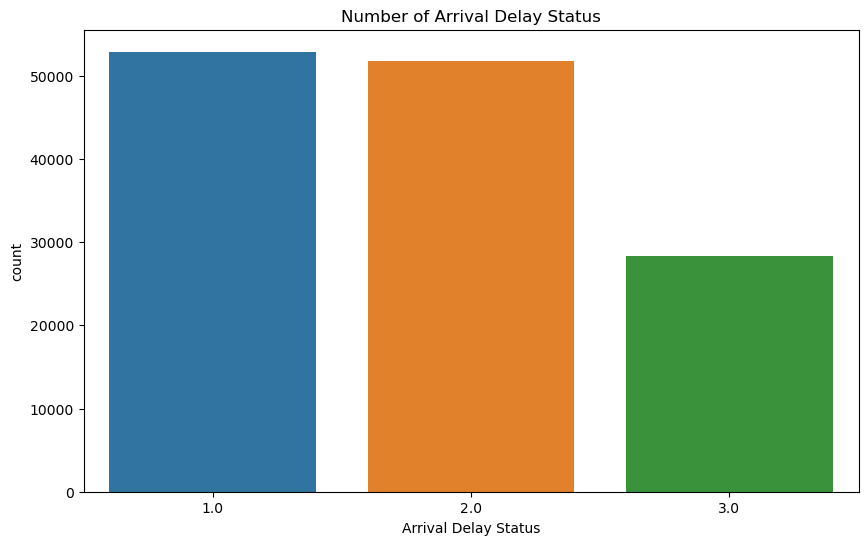

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Status', order=flt_data_copy['Status'].value_counts().index, data=flt_data_copy)
plt.title('Number of Arrival Delay Status')
plt.xlabel('Arrival Delay Status')
plt.show()


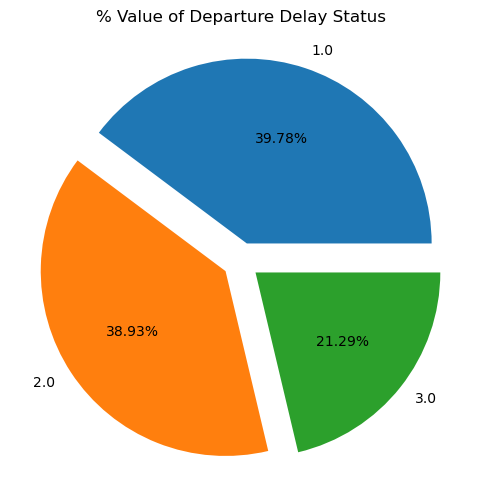

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
status_counts = flt_data_copy['Status'].value_counts()
explode = [0.1] * len(status_counts)

plt.figure(figsize=(10, 6))
status_counts.plot.pie(explode=explode, autopct='%1.2f%%', shadow=False)
plt.title('% Value of Departure Delay Status')
plt.ylabel('')
plt.show()


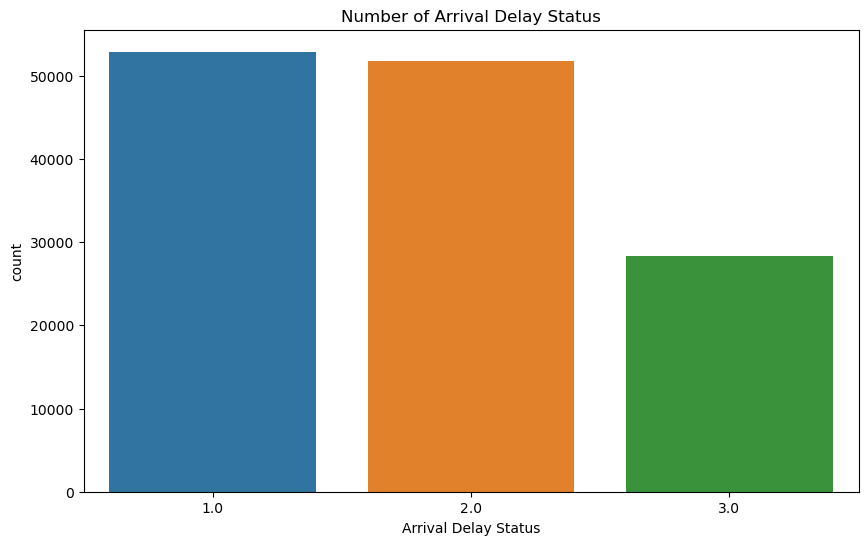

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', order=flt_data_copy['Status'].value_counts().index, data=flt_data_copy)
plt.title('Number of Arrival Delay Status')
plt.xlabel('Arrival Delay Status')
plt.show()


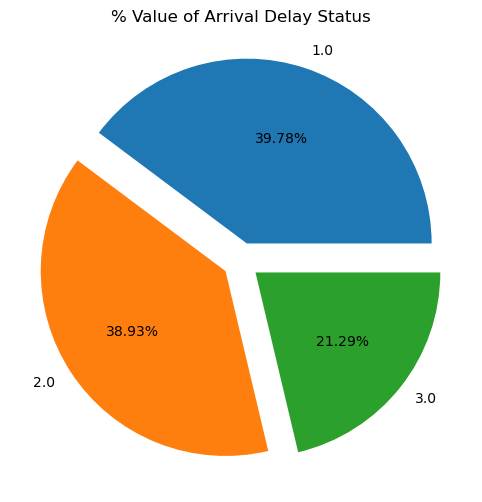

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

status_counts = flt_data_copy['Status'].value_counts()

explode = [0.1] * len(status_counts)

plt.figure(figsize=(10, 6))
status_counts.plot.pie(explode=explode, autopct='%1.2f%%', shadow=False)
plt.title('% Value of Arrival Delay Status')
plt.ylabel('')
plt.show()


In [30]:
scheduled_departure = df.count()['sched_dep_time'] 
actual_departure = df.count()['dep_time']  
cancel_departure = scheduled_departure - actual_departure
ratio_oper = actual_departure / scheduled_departure * 100

ratio_cancel = 100 - ratio_oper
                                            
print("Sched_dep: ", scheduled_departure)
print("Operated: ", actual_departure)
print("Cancelled: ", cancel_departure)
print("\n")
print("Ratio operated flights over scheduled flights: %s" % ratio_oper)
print("Ratio of cancelled flights: %s" % ratio_cancel)

Sched_dep:  336776
Operated:  328521
Cancelled:  8255


Ratio operated flights over scheduled flights: 97.54881583010666
Ratio of cancelled flights: 2.451184169893338


In [31]:

Delay_Day=flt_data_copy.groupby(['day','month'], as_index=False).agg({'dep_delay': 'mean'})
Delay_Day_max=Delay_Day['dep_delay'].max()
Delay_Day_info=Delay_Day[Delay_Day['dep_delay']==Delay_Day_max]
print("The day and month having highest delay by average for departures" '\n' ,Delay_Day_info)

The day and month having highest delay by average for departures
     day  month  dep_delay
86    8      3      83.65
